In [3]:
import numpy as np
import math
import networkx
import matplotlib.pyplot as plt

In [4]:
# compute euclidean distances between cluster centroids
def computeDistance(centroids):
  distances = [[0 for _ in range(len(centroids))] for _ in range(len(centroids))]
  for i in range(len(centroids)):
    for j in range(len(centroids)):
      curDistance = 0
      for gene in range(len(centroids[0])):
        curDistance += (centroids[i][gene] - centroids[j][gene])**2
      distance = math.sqrt(curDistance)
      distances[i][j] = distance
      distances[j][i] = distance
  return distances

In [5]:
# create graph
def createGraph(centroids, distances):
  V = set(range(len(centroids)))
  E = set()
  for i in range(len(distances)):
    for j in range(i, len(distances)):
      dist = distances[i][j]
      if dist != 0:
        E.add((dist, i, j))
  return V,E

In [6]:
def kruskals(V, E):
  MST = set()
  unionFind = {}
  setCounts = [0 for _ in range(len(V))]

  for vertex in V:
    unionFind[vertex] = vertex
    setCounts[vertex] = 1

  sortedEdges = sorted(E)
  for (dist, v1, v2) in sortedEdges:

    # check if added edge creates a cycle
    set1, set2 = unionFind[v1], unionFind[v2]
    if set1 != set2:
      
      # add to current MST
      MST.add((dist,v1,v2))

      # Merge unionFind sets after adding edge
      if setCounts[v1] < setCounts[v2]:
        setCounts[v2] += setCounts[v1]
        setCounts[v1] = 0
        for u in unionFind:
          if unionFind[u] == set1:
            unionFind[u] = set2
      else:
        setCounts[v1] += setCounts[v2]
        setCounts[v2] = 0
        for u in unionFind:
          if unionFind[u] == set2:
            unionFind[u] = set1

  return MST

In [7]:
# visualize graph
def showGraph(MST):
    MSTEdges = [(i,j) for (dist,i,j) in MST]
    G = networkx.Graph()
    G.add_edges_from(MSTEdges)
    networkx.draw_networkx(G)
    plt.show()

pca,kmeans_centroids.csv


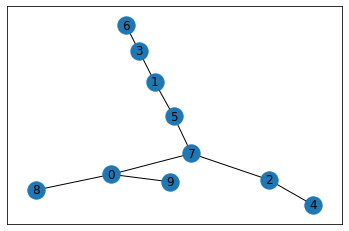

svd,kmeans_centroids.csv


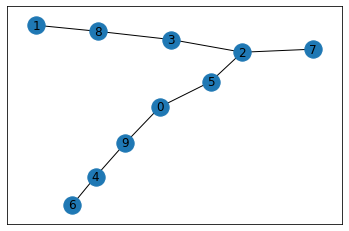

tsne,kmeans_centroids.csv


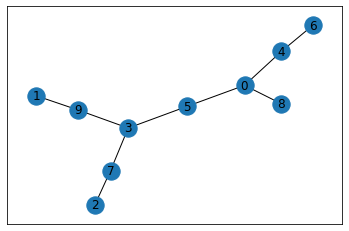

In [11]:
filenames = ['pca,kmeans_centroids.csv', 'svd,kmeans_centroids.csv', 'tsne,kmeans_centroids.csv']
for filename in filenames:
    centroids = np.loadtxt(filename, delimiter=',')
    distances = computeDistance(centroids)
    V,E = createGraph(centroids, distances)
    MST = kruskals(V,E)
    print(filename)
    showGraph(MST)
